<a href="https://colab.research.google.com/github/AMohamedAakhil/kaggle-housing-price-prediction/blob/main/kagglehousingdetailed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages and Loading Data**

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

import warnings
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')

train = pd.read_csv('train (3).csv')
test = pd.read_csv('test (3).csv')

In [294]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [295]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [296]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [297]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [298]:
train.drop('Id', axis=1, inplace=True)
test.drop('Id', axis=1, inplace=True)

In [299]:
y = train.SalePrice
train_features = train.drop('SalePrice', axis=1)
test_features = test
train_features.shape, test_features.shape

((1460, 79), (1459, 79))

# **Exploratory Data Analysis!!**

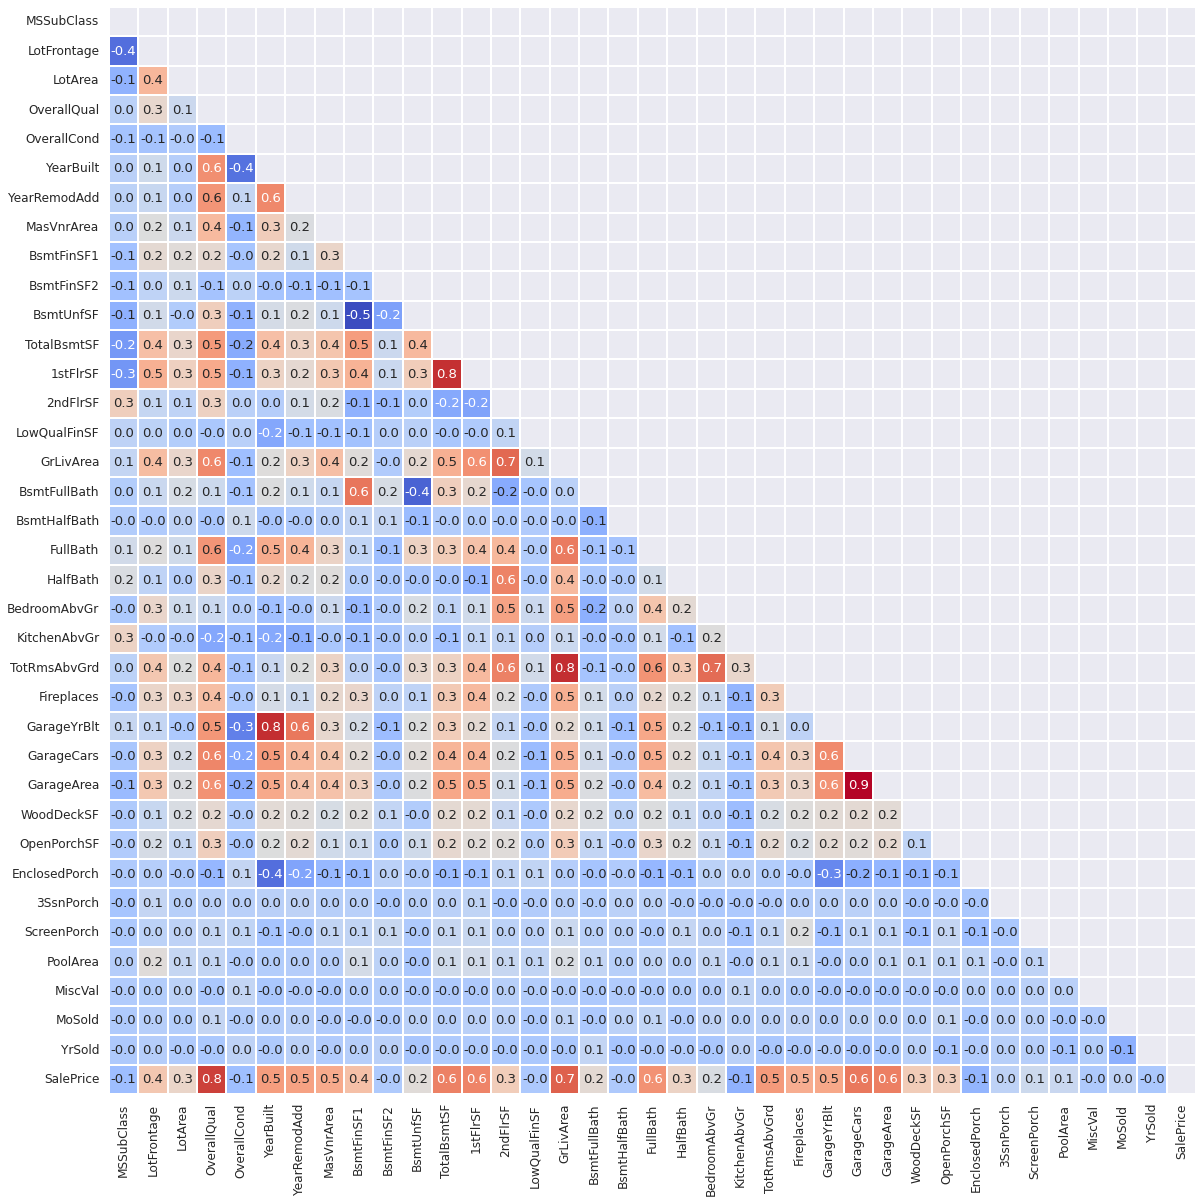

In [300]:
# Heatmap correlation : 

sns.set(font_scale = 1.1)
correlation_train = train.corr()
mask = np.triu(correlation_train.corr()) # making mask so that can delete upper right triangle since iz just a mirror 
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_train, annot=True, fmt='.1f', cmap='coolwarm', square=True, mask=mask, linewidths=1, cbar=False)
plt.show()

- Seeing some obvious correlations like GarageCars and GarageArea which have high correlation
- Overall quality and saleprice have high correlation 
- Can observe some other correlations

# **Handling Missing Values**

---

So In some features, missing values actually means something. 
Will list dat specific features below : (data description provided in competition) 

- Alleys : NA - No alley access
- MasVnrType : None - No veneer type 
- BsmtQual : NA - No Basement
- BsmtCond: NA - No Basement
- BsmtExposure: NA - No Basement
- BsmtFinType1 : NA - No Basement
- BsmtFinType2 : NA - No Basement
- BsmtFinSF2, BsmtUnfSF, TotalBsmtSF :: not given anything but NA = No basement
- FireplaceQu : NA - No fireplace
- GarageType : NA - No Garage
- GarageFinish : NA - No Garage
- GarageQual, GarageCond : NA - No Garage
- PoolQC : NA - No Pool
- Fence : NA - No fence
- MiscFeature: NA - No miscellaneous feature



In [301]:
# Dese are List of 'NaN' including columns where NaN's mean none.

none_cols = [
    'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]

# List of 'NaN' including columns where NaN's mean 0.

zero_cols = [
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
    'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'
]

# List of 'NaN' including columns where NaN's actually missing gonna replaced with mode.

freq_cols = [
    'Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual',
    'SaleType', 'Utilities'
]

for i in zero_cols: 
    train_features[i].replace(np.nan, 0, inplace=True)
    test_features[i].replace(np.nan, 0, inplace=True)

for i in freq_cols: 
    train_features[i].replace(np.nan, train_features[i].mode()[0], inplace=True)
    test_features[i].replace(np.nan, test_features[i].mode()[0], inplace=True)

for i in none_cols: 
    train_features[i].replace(np.nan, 'None', inplace=True)
    test_features[i].replace(np.nan, 'None', inplace=True)


In [302]:
train_features.MSZoning = train_features.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))
test_features.MSZoning = test_features.groupby('MSSubClass')['MSZoning'].apply(lambda x: x.fillna(x.mode()[0]))

In [303]:

train_features['LotFrontage'] = train_features.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [304]:

test_features['LotFrontage'] = test_features.groupby(
    ['Neighborhood'])['LotFrontage'].apply(lambda x: x.fillna(x.median()))

In [305]:
# converting features with numeric data to category as they are suppose to be treat as a category 

train_features.MSSubClass = train_features.MSSubClass.astype(str)
train_features.YrSold = train_features.YrSold.astype(str)
train_features.MoSold = train_features.MoSold.astype(str)

test_features.MSSubClass = test_features.MSSubClass.astype(str)
test_features.YrSold = test_features.YrSold.astype(str)
test_features.MoSold = test_features.MoSold.astype(str)



In [306]:
train_features.shape, y.shape

((1460, 79), (1460,))

# **Feature Engineering 😼**

In [307]:
#fig, axes = plt.subplots(12, 3, figsize=(25, 80))
#axes = axes.flatten()

#for i, j in zip(train_features.select_dtypes(include=['number']).columns, axes):
    #sns.regplot(x=i, y=y, data=train_features, ax=j, order=3, ci=None, line_kws={'color': 'black'}, scatter_kws={'alpha':0.4})


outlier ahh data

# Outlier Removal

In [308]:
train_features = train_features.join(y)

train_features = train_features.drop(train_features[(train_features['OverallQual'] < 5)
                                  & (train_features['SalePrice'] > 200000)].index)
train_features = train_features.drop(train_features[(train_features['GrLivArea'] > 4000)
                                  & (train_features['SalePrice'] < 200000)].index)
train_features = train_features.drop(train_features[(train_features['GarageArea'] > 1200)
                                  & (train_features['SalePrice'] < 200000)].index)
train_features = train_features.drop(train_features[(train_features['TotalBsmtSF'] > 3000)
                                  & (train_features['SalePrice'] > 320000)].index)
train_features = train_features.drop(train_features[(train_features['1stFlrSF'] < 3000)
                                  & (train_features['SalePrice'] > 600000)].index)
train_features = train_features.drop(train_features[(train_features['1stFlrSF'] > 3000)
                                  & (train_features['SalePrice'] < 200000)].index)


y = train_features['SalePrice']
y.dropna(inplace=True)
train_features.drop(columns='SalePrice', inplace=True)


In [309]:
train_features.shape, y.shape

((1449, 79), (1449,))

## Creatin new features

In [310]:
train_features['TotalSF'] = (train_features['BsmtFinSF1'] + train_features['BsmtFinSF2'] +
                       train_features['1stFlrSF'] + train_features['2ndFlrSF'])
train_features['TotalBathrooms'] = (train_features['FullBath'] +
                              (0.5 * train_features['HalfBath']) +
                              train_features['BsmtFullBath'] +
                              (0.5 * train_features['BsmtHalfBath']))

train_features['TotalPorchSF'] = (train_features['OpenPorchSF'] + train_features['3SsnPorch'] +
                            train_features['EnclosedPorch'] +
                            train_features['ScreenPorch'] + train_features['WoodDeckSF'])

train_features['YearBlRm'] = (train_features['YearBuilt'] + train_features['YearRemodAdd'])

test_features['TotalSF'] = (test_features['BsmtFinSF1'] + test_features['BsmtFinSF2'] +
                       test_features['1stFlrSF'] + test_features['2ndFlrSF'])
test_features['TotalBathrooms'] = (test_features['FullBath'] +
                              (0.5 * test_features['HalfBath']) +
                              test_features['BsmtFullBath'] +
                              (0.5 * test_features['BsmtHalfBath']))

test_features['TotalPorchSF'] = (test_features['OpenPorchSF'] + test_features['3SsnPorch'] +
                            test_features['EnclosedPorch'] +
                            test_features['ScreenPorch'] + test_features['WoodDeckSF'])

test_features['YearBlRm'] = (test_features['YearBuilt'] + test_features['YearRemodAdd'])

In [311]:
train_features.shape, y.shape

((1449, 83), (1449,))

# Need to unskew some features

usin sumn called box cox transfo.. (copyin dis shi up )

In [312]:
from scipy import stats
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p

skewed = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    'ScreenPorch', 'PoolArea', 'LowQualFinSF', 'MiscVal'
]

skew_train_features = np.abs(train_features[skewed].apply(lambda x: skew(x)).sort_values(
    ascending=False))

# Filtering skewed train_features.

high_skew = skew_train_features[skew_train_features > 0.3]

# Taking indexes of high skew.

skew_index = high_skew.index

# Applying boxcox transformation to fix skewness.

for i in skew_index:
    train_features[i] = boxcox1p(train_features[i], boxcox_normmax(train_features[i] + 1))

In [313]:

skew_test_features = np.abs(test_features[skewed].apply(lambda x: skew(x)).sort_values(
    ascending=False))

# Filtering skewed test_features.

high_skew = skew_test_features[skew_test_features > 0.3]

# Taking indexes of high skew.

skew_index = high_skew.index

# Applying boxcox transformation to fix skewness.

for i in skew_index:
    test_features[i] = boxcox1p(test_features[i], boxcox_normmax(test_features[i] + 1))

## **Dropping unnecessary featues which aint givin a shi correlation :**
and also doin one hot encodin last line 

In [314]:

to_drop = [
    'Utilities',
    'PoolQC',
    'YrSold',
    'MoSold',
    'ExterQual',
    'BsmtQual',
    'GarageQual',
    'KitchenQual',
    'HeatingQC',
]

train_features = train_features.join(y)
test_features = test_features.join(y)
train_features.drop(columns=to_drop, inplace=True)
test_features.drop(columns=to_drop, inplace=True)
train_features.drop('SalePrice', axis=1, inplace=True)
test_features.drop('SalePrice', axis=1, inplace=True)
train_features = pd.get_dummies(data=train_features)
test_features = pd.get_dummies(data=test_features)

# **Modelling!**

In [315]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [316]:
# train_features.drop('SalePrice', axis=1, inplace=True)

# x_train, x_test, y_train, y_test = train_test_split(train_features, y, test_size=0.3)
model = GradientBoostingRegressor()
model.fit(train_features, y)

ypreds = model.predict(test_features)

ValueError: ignored

In [322]:
test_features[39]

KeyError: ignored